In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

Mounted at /content/drive
/content/drive/MyDrive/IS4303/notebooks/new_cleaned


## Helpers

In [4]:
X_train = pd.read_csv('./5X_train.csv')
X_test = pd.read_csv('./4X_test.csv')
y_train = pd.read_csv('./5y_train.csv')
y_test = pd.read_csv('./4y_test.csv')
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
def plot_preds(preds, probas, truth):
  auc_score = roc_auc_score(truth, probas)
  prec = precision_score(truth, preds)
  rec = recall_score(truth, preds)
  f1 = f1_score(truth, preds)
  print(f"AUC: {auc_score:.2f}\n")
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f"F1: {f1:.2f}\n")

  fpr, tpr, thresholds = roc_curve(truth, probas)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

## Tuning and training

In [ ]:
logreg_params = {
  'penalty': ['l1', 'l2', None],
  'C': [0.001, 0.01, 0.1, 1, 10],
  'max_iter': [200, 500, 1000], # due to convergence issues with lower iter
  'solver': ['newton-cg', 'lbfgs'],
}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, logreg_params, cv=3, n_jobs=-1, scoring='f1', verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver n

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [200, 500, 1000],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='f1', verbose=10)

In [ ]:
grid_search.best_params_

{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [6]:
params = {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
clf = LogisticRegression(**params).fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.80

Precision: 0.54
Recall: 0.72
F1: 0.62



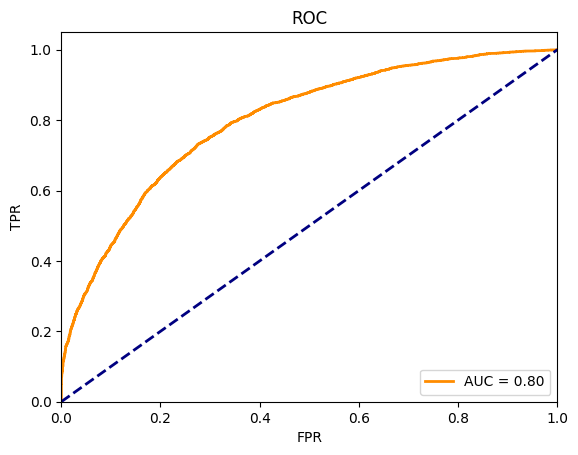

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

In [7]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(clf, f)